# CIFAR 10

## Load data and prepare train, test samples

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.optimizers import SGD, Adam

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

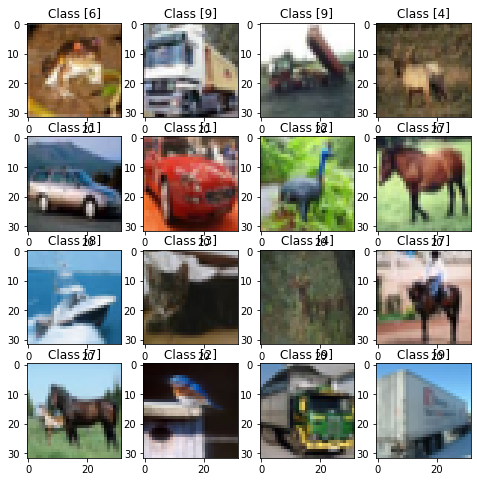

In [6]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Build model

### plausible model 1

In [9]:

model = Sequential([
  Conv2D(32, kernel_size=3, input_shape=(32, 32, 3)),
  Conv2D(16, kernel_size=3, strides=2),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(256, activation='relu'),
  Dropout(0.4),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [10]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), workers=4, batch_size=64, epochs=20)

Epoch 1/20
782/782 [==============================] - 8s 8ms/step - loss: 1.7726 - accuracy: 0.3548 - val_loss: 1.2559 - val_accuracy: 0.5525
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 1.2482 - accuracy: 0.5607 - val_loss: 1.1240 - val_accuracy: 0.6084
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 1.0909 - accuracy: 0.6161 - val_loss: 1.0850 - val_accuracy: 0.6176
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.9987 - accuracy: 0.6517 - val_loss: 0.9829 - val_accuracy: 0.6591
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.9307 - accuracy: 0.6745 - val_loss: 0.9361 - val_accuracy: 0.6729
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.8559 - accuracy: 0.6999 - val_loss: 0.9419 - val_accuracy: 0.6690
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.8065 - accuracy: 0.7170 - val_loss: 0.9449 - val_accuracy: 0.6776
Epoch 

In [11]:
score = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 1.0313 - accuracy: 0.6773


### plausible model 2

In [12]:
model = Sequential()
# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
# this applies 24 convolution filters of size 3x3 each.
model.add(Conv2D(24, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(24, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 24)        672       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 24)        5208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        6944      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)         

In [13]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=20)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8454 - accuracy: 0.3128
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3380 - accuracy: 0.5185
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1711 - accuracy: 0.5808
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0857 - accuracy: 0.6143
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0305 - accuracy: 0.6381
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9683 - accuracy: 0.6573
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9302 - accuracy: 0.6720
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9070 - accuracy: 0.6806
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8889 - accuracy: 0.6868
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - l

### Plot results

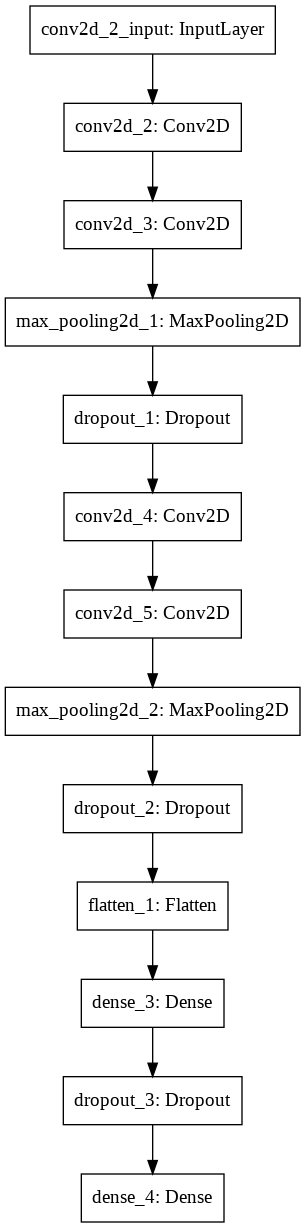

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model)

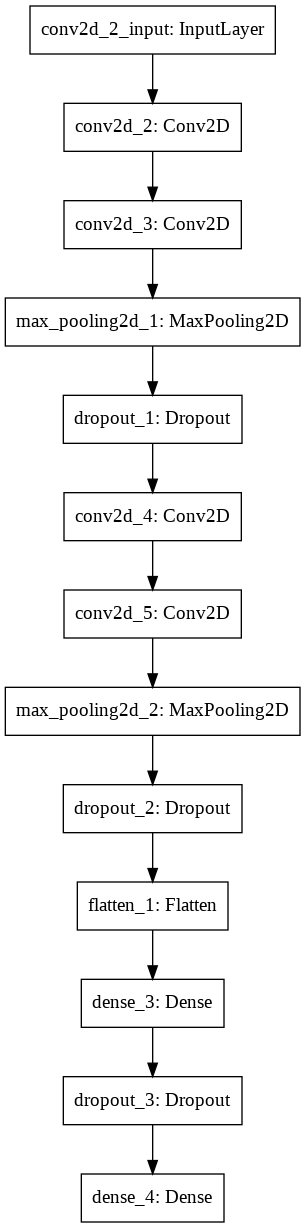

In [15]:
from IPython.display import Image
Image("model.png", width=200, height=400)